## MNIST Data Set - Basic Approach

### Get the MNIST Data

In [0]:
import tensorflow as tf
import numpy as np
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
#the above is depricated.

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [86]:
X_train.shape, y_test.shape

((60000, 28, 28), (10000,))

In [4]:
type(X_train)

numpy.ndarray

In [5]:
X_train[0].shape

(28, 28)

### Visualizing the Data

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

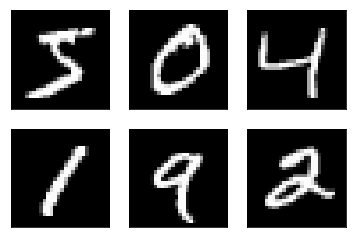

In [7]:
fig, axes = plt.subplots(2, 3)
for i in range(2):
    for j in range(3):
        axes[i][j].imshow(X_train[3*i+j], cmap = 'gist_gray') #remove the color, only black and white
        #remove the ticks and labels
        axes[i][j].tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False) # labels along the bottom edge are off)
        axes[i][j].tick_params(axis='y',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                left=False,      # ticks along the bottom edge are off
                right=False,         # ticks along the top edge are off
                labelleft=False) # labels along the bottom edge are off)

In [8]:
#we need to normalize the data
X_train[0].min(), X_train[1].max()

(0, 255)

In [9]:
y_train.min(), y_train.max()

(0, 9)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0].max(), X_test[0].max()

(1.0, 1.0)

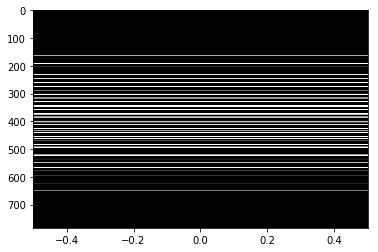

In [12]:
#visualize it after being flattened.
plt.imshow(X_train[0].reshape(-1, 1, order = 'F'), cmap = 'gist_gray', aspect='auto') #'F': column by column, 'C': row by row

In [13]:
y_test[0], type(y_test[0])

(7, numpy.uint8)

### Create the Model

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 28*28])

In [0]:
rnd = np.float32(np.random.random((28*28, 10)))
W = tf.Variable(initial_value=rnd)

In [0]:
rnd = np.float32(np.random.random((10)))
b = tf.Variable(initial_value=rnd)

In [0]:
y = tf.add(tf.matmul(x, W), b)

In [0]:
y_true = tf.placeholder(tf.int64, [None])

In [0]:
#use sparse_softmax_cross_entropy_with_logits because the label is not one-hot-encoder coded
cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y_true, logits=y))


In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [0]:
train = optimizer.minimize(cross_entropy)

### Create batch function

In [0]:
def next_batch(data_x, data_y, step_index, batches):
    start_index = step_index % data_x.shape[0]
    end_index = start_index + batches - 1
    if end_index <= data_x.shape[0]:
        return data_x[start_index: end_index+1].reshape((batches, -1)), data_y[start_index: end_index+1]
    else:
        end_index_2 = end_index-data_x.shape[0]
        return np.append(data_x[start_index:], data_x[:end_index_2]).reshape((batches, -1)), np.append(data_y[start_index:], data_y[:end_index_2])
    

In [0]:
init = tf.global_variables_initializer()

In [88]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(2000):
        batch_x, batch_y = next_batch(X_train, y_train, step, 100)
        sess.run(train, {x: batch_x, y_true: batch_y})
    
    #training set
    matches = tf.equal(tf.argmax(y, axis = 1), y_true)  
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))  
    print ("Training set accuracy:", sess.run(acc, {x: next_batch(X_train, y_train, 0, 60000)[0], y_true: next_batch(X_train, y_train, 0, 60000)[1]}))
    #test set
    matches = tf.equal(tf.argmax(y, axis = 1), y_true)  
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))  
    print ("Test set accuracy:", sess.run(acc, {x: next_batch(X_test, y_test, 0, 10000)[0], y_true: next_batch(X_test, y_test, 0, 10000)[1]}))


Training set accuracy: 0.8509
Test set accuracy: 0.8555
